# Mettre en place notre environnement
________

La première chose que nous devons faire est de charger les bibliothèques et les ensembles de données que nous allons utiliser. Pour aujourd'hui, nous allons travailler avec deux ensembles de données : un contenant des chroniques de température dans le lit de la rivière (zone hyporhéique), et un autre contenant des les chroniques de différence de charge enregistré en **Volt**.

**Important!** Assurez-vous d'exécuter cette cellule vous-même ou le reste de votre code ne fonctionnera pas

In [32]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# C:/Users/nilss/Desktop/tp_molo_1/MOLONARI_1D_RESOURCES
# read in our data
capteur_riviere = pd.read_csv("/Users/antoine/Documents/Mines/Cours/2A/Molonari/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_P_measures.csv",
                             sep = ',', header = 0, names = ['dates', 'tension_V', 'temperature_stream_C'], usecols = [1, 2, 3], skiprows=1)
capteur_ZH = pd.read_csv("/Users/antoine/Documents/Mines/Cours/2A/Molonari/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_T_measures.csv",
                        sep = ',', header = 0, names = ['dates', 'temperature_depth_1_C', 'temperature_depth_2_C', 'temperature_depth_3_C', 'temperature_depth_4_C'], usecols = [1, 2, 3, 4, 5], skiprows=1)
etalonage_capteur_riv = pd.read_csv("/Users/antoine/Documents/Mines/Cours/2A/Molonari/MOLONARI_1D_RESOURCES/configuration/pressure_sensors/P508.csv")

# set seed for reproducibility
np.random.seed(0)

Nous sommes maintenant prêts à examiner quelques dates ! (Si vous le souhaitez, vous pouvez profiter de cette occasion pour jeter un coup d'œil à certaines des données).

# Imprimez le noms des colonnes
renommer les colonnes du fichier capteur_riviere :  	dates,tension_V,temperature_stream_C et celles du fichier capteur_ZH  :
#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C



In [33]:
capteur_riviere.head()

,dates,tension_V,temperature_stream_C
0,06/27/16 12:00:00 PM,1.26787,18.342
1,06/27/16 12:15:00 PM,1.06630,13.898
2,06/27/16 12:30:00 PM,1.20661,13.915
3,06/27/16 12:45:00 PM,1.24533,13.939
4,06/27/16 01:00:00 PM,1.24437,13.967


In [34]:
capteur_ZH.head()

,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C
0,06/27/16 12:00:00 PM,13.810,13.834,13.858,13.810
1,06/27/16 12:15:00 PM,13.834,13.858,13.882,13.834
2,06/27/16 12:30:00 PM,13.930,13.954,14.050,14.002
3,06/27/16 12:45:00 PM,13.882,13.954,14.026,13.954
4,06/27/16 01:00:00 PM,13.858,13.930,14.026,13.954


# Transformez les données de différence de charge en mètres



In [35]:
etalonage_capteur_riv.head()

,Sensor_Name,P508
0,Datalogger,Hobo
1,Calibration_Date,2016/01/12 10:10:10
2,Intercept,1.210344
3,dU/dH,-1.462495
4,dU/dT,0.001474


In [36]:
intercept = float(etalonage_capteur_riv['P508'][2])
a = float(etalonage_capteur_riv['P508'][3])
b = float(etalonage_capteur_riv['P508'][4])
print(intercept, a ,b)

1.210344 -1.462495 0.001474


In [37]:
capteur_riviere['diff_charge_m'] = (capteur_riviere['tension_V'].astype(float)-intercept-capteur_riviere['temperature_stream_C'].astype(float)*b)/a

capteur_riviere.head()

,dates,tension_V,temperature_stream_C,diff_charge_m
0,06/27/16 12:00:00 PM,1.26787,18.342,-0.020848
1,06/27/16 12:15:00 PM,1.06630,13.898,0.112499
2,06/27/16 12:30:00 PM,1.20661,13.915,0.016578
3,06/27/16 12:45:00 PM,1.24533,13.939,-0.009873
4,06/27/16 01:00:00 PM,1.24437,13.967,-0.009189


# Traitement des dates
## Vérifiez le type de données de notre colonne de date
___

Imprimer les dates des deux fichiers

In [38]:
capteur_riviere['dates']

0       06/27/16 12:00:00 PM
1       06/27/16 12:15:00 PM
2       06/27/16 12:30:00 PM
3       06/27/16 12:45:00 PM
4       06/27/16 01:00:00 PM
                ...         
1455        07/12/2016 15:45
1456        07/12/2016 16:00
1457        07/12/2016 16:15
1458        07/12/2016 16:30
1459        07/12/2016 16:45
Name: dates, Length: 1460, dtype: object

In [39]:
capteur_ZH['dates']

0       06/27/16 12:00:00 PM
1       06/27/16 12:15:00 PM
2       06/27/16 12:30:00 PM
3       06/27/16 12:45:00 PM
4       06/27/16 01:00:00 PM
                ...         
1433    07/12/16 10:15:00 AM
1434    07/12/16 10:30:00 AM
1435    07/12/16 10:45:00 AM
1436    07/12/16 10:49:31 AM
1437    07/12/16 10:49:47 AM
Name: dates, Length: 1438, dtype: object

Remarquez qu'en bas de la sortie de `head()`, vous pouvez voir qu'il est dit que le type de données de cette colonne est "object". 

> Pandas utilise le dtype "object" pour stocker différents types de données, mais le plus souvent, lorsque vous voyez une colonne avec le dtype "object", elle contient des chaînes de caractères. 

Si vous consultez la documentation sur le dtype de Pandas [ici] (http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), vous remarquerez qu'il existe également un dtype spécifique `datetime64`. Comme le dtype de notre colonne est `object` plutôt que `datetime64`, nous pouvons dire que Python ne sait pas que cette colonne contient des dates.

Nous pouvons aussi regarder uniquement le dtype de votre colonne sans imprimer les premières lignes si nous le souhaitons :

In [40]:
# check the data type of our date column
capteur_riviere.dtypes

dates                    object
tension_V               float64
temperature_stream_C    float64
diff_charge_m           float64
dtype: object

In [41]:
capteur_ZH.dtypes

dates                     object
temperature_depth_1_C    float64
temperature_depth_2_C    float64
temperature_depth_3_C    float64
temperature_depth_4_C    float64
dtype: object

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

## Convertir nos colonnes de date en datetime
___

Maintenant que nous savons que notre colonne de date n'est pas reconnue comme une date, il est temps de la convertir pour qu'elle soit reconnue comme une date. Cette opération est appelée "analyse syntaxique des dates" car nous prenons une chaîne de caractères et identifions ses composants. Nous allons utiliser la fonction pd.to_datetime.

Nous pouvons indiquer à pandas le format de nos dates à l'aide d'un guide appelé ["strftime directive", sur lequel vous trouverez plus d'informations à ce lien] (http://strftime.org/). L'idée de base est que vous devez indiquer quelles parties de la date se trouvent où et quelle ponctuation se trouve entre elles. Il existe [de nombreuses parties possibles d'une date](http://strftime.org/), mais les plus courantes sont `%d` pour le jour, `%m` pour le mois, `%y` pour une année à deux chiffres et `%Y` pour une année à quatre chiffres.

Quelques exemples :

 * Le 17 janvier 2007 a le format "%m/%d/%y".
 * 17-1-2007 a le format "%d-%m-%Y".
 

In [42]:
capteur_riviere['dates'] = pd.to_datetime(capteur_riviere['dates'], infer_datetime_format=True)
capteur_ZH['dates'] = pd.to_datetime(capteur_ZH['dates'], infer_datetime_format=True)
capteur_riviere['dates']

0      2016-06-27 12:00:00
1      2016-06-27 12:15:00
2      2016-06-27 12:30:00
3      2016-06-27 12:45:00
4      2016-06-27 13:00:00
               ...        
1455   2016-07-12 15:45:00
1456   2016-07-12 16:00:00
1457   2016-07-12 16:15:00
1458   2016-07-12 16:30:00
1459   2016-07-12 16:45:00
Name: dates, Length: 1460, dtype: datetime64[ns]

Maintenant que nos dates sont analysées correctement, nous pouvons travailler avec celles-ci.

___
* Bien que nous spécifions le format de la date ici, il arrive parfois que vous rencontriez une erreur lorsque plusieurs formats de date sont présents dans une même colonne. Dans ce cas, vous pouvez demander à pandas de déduire le bon format de date. Vous pouvez le faire comme suit :

`capteur_riviere['date'] = pd.to_datetime(capteur_riviere['date'], infer_datetime_format=True)``

**Pourquoi ne pas toujours utiliser `infer_datetime_format = True?`** Il y a deux grandes raisons de ne pas toujours faire deviner à pandas le format de l'heure. La première est que pandas n'est toujours capable de trouver le bon format de date, surtout si quelqu'un a fait preuve de créativité dans la saisie des données. La seconde est que c'est beaucoup plus lent que de spécifier le format exact des dates.
____

## Tracer le jour du mois pour vérifier l'analyse de la date
___

L'un des plus grands dangers de l'analyse des dates est de mélanger les mois et les jours. La fonction to_datetime() a des messages d'erreur très utiles, mais il n'est pas inutile de vérifier que les jours du mois que nous avons extraits ont un sens. 

Pour ce faire, nous allons tracer un histogramme des jours du mois. Nous nous attendons à ce qu'il ait des valeurs entre 1 et 31 et, puisqu'il n'y a aucune raison de supposer que les glissements de terrain sont plus fréquents certains jours du mois que d'autres, une distribution relativement égale. (Avec un creux sur 31 car tous les mois n'ont pas 31 jours.) 

<AxesSubplot:>

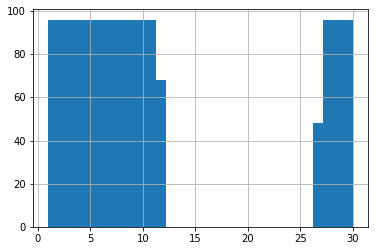

In [43]:
capteur_riviere['dates'].dt.day.hist(bins = 31)

<AxesSubplot:>

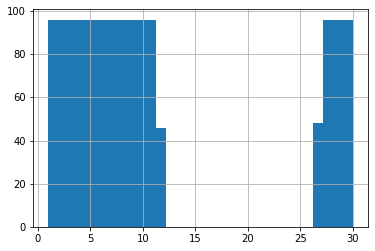

In [44]:
capteur_ZH['dates'].dt.day.hist(bins = 31)

# Valeurs aberrantes

L'un des plus grands défis du nettoyage des données est l'identification et le traitement des valeurs aberrantes. En termes simples, les valeurs aberrantes sont des observations qui sont significativement différentes des autres points de données. Même les meilleurs algorithmes d'estimation des paramètres automatique seront moins performants si les observations aberrantes ne sont pas nettoyées des données, car elles impliquent des simulations obsolètes des variables.



In [45]:
print(capteur_riviere.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dates                 1460 non-null   datetime64[ns]
 1   tension_V             1460 non-null   float64       
 2   temperature_stream_C  1460 non-null   float64       
 3   diff_charge_m         1460 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 45.8 KB
None


## Identification des valeurs aberrantes

La présence de valeurs aberrantes dans les données peut avoir de nombreuses raisons. Parfois, les valeurs aberrantes peuvent être authentiques, alors que dans d'autres cas, elles peuvent être dues à des erreurs de saisie de données. Il est important de comprendre les raisons des valeurs aberrantes avant de les nettoyer.

Nous allons commencer le processus de recherche des valeurs aberrantes en exécutant les statistiques sommaires sur les variables. Pour ce faire, nous utilisons la fonction describe() ci-dessous, qui fournit un résumé statistique de toutes les variables quantitatives.




In [47]:
capteur_riviere.describe()

,tension_V,temperature_stream_C,diff_charge_m
count,1460.000000,1460.000000,1460.000000
mean,1.256888,14.896441,-0.016812
std,0.047302,1.142397,0.032176
min,0.652670,9.066000,-0.140099
25%,1.246590,14.203750,-0.025327
50%,1.262150,14.818000,-0.020557
75%,1.270010,15.555000,-0.009784
max,1.432100,18.342000,0.390494


In [46]:
capteur_ZH.describe()

,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C
count,1436.000000,1436.000000,1436.000000,1436.000000
mean,14.717557,14.502795,14.348946,14.097808
std,0.721799,0.531472,0.423288,0.328507
min,13.329000,13.642000,13.762000,13.690000
25%,14.146000,14.098000,14.050000,13.882000
50%,14.625000,14.409000,14.242000,14.002000
75%,15.127000,14.768000,14.505000,14.194000
max,17.320000,17.296000,17.034000,17.130000


## Tracez les graphiques de distribution pour les différentes variables

### Box plot

Le box plot est une manière standardisée d'afficher la distribution des données sur la base du résumé en cinq chiffres (minimum, premier quartile (Q1), médiane, troisième quartile (Q3) et maximum). Elle est souvent utilisée pour identifier la distribution des données et détecter les valeurs aberrantes. La ligne de code ci-dessous trace le box plot de la variable numérique 'Loan_amount'. 

<AxesSubplot:>

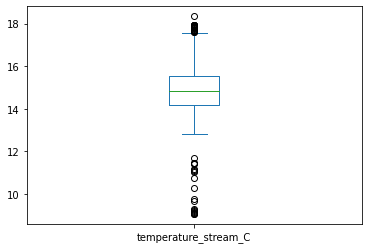

In [65]:
capteur_riviere['temperature_stream_C'].plot.box()

<AxesSubplot:>

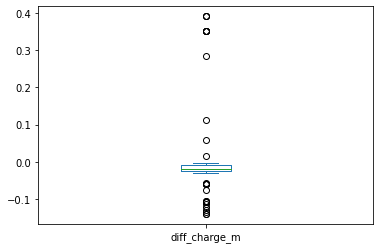

In [66]:
capteur_riviere['diff_charge_m'].plot.box()

<AxesSubplot:>

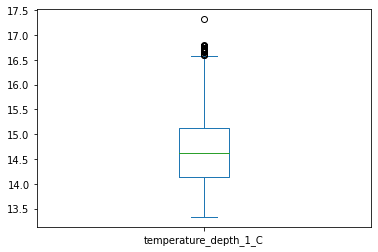

In [68]:
capteur_ZH['temperature_depth_1_C'].plot.box()

<AxesSubplot:>

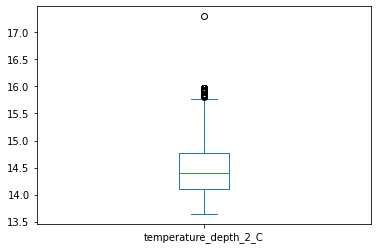

In [69]:
capteur_ZH['temperature_depth_2_C'].plot.box()

<AxesSubplot:>

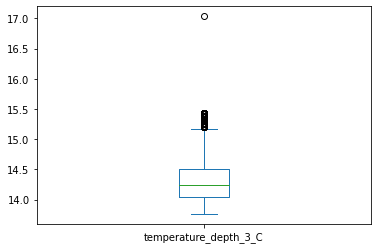

In [70]:
capteur_ZH['temperature_depth_3_C'].plot.box()

<AxesSubplot:>

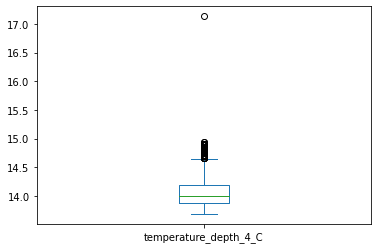

In [71]:
capteur_ZH['temperature_depth_4_C'].plot.box()

## 2. Histogramme

Un histogramme est utilisé pour visualiser la distribution d'une variable numérique. Une valeur aberrante apparaît en dehors du modèle général de distribution. La ligne de code ci-dessous trace un histogramme de la variable 'Revenu', en utilisant la fonction hist(). A histogram is used to visualize the distribution of a numerical variable. An outlier will appear outside the overall pattern of distribution. The line of code below plots a histogram of the 'Income' variable, using the hist() function. 

array([[<AxesSubplot:title={'center':'temperature_stream_C'}>,
        <AxesSubplot:title={'center':'diff_charge_m'}>]], dtype=object)

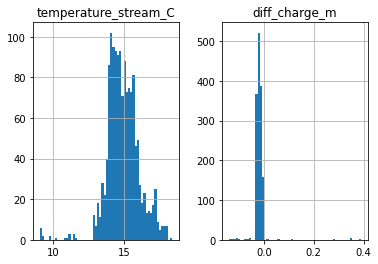

In [80]:
capteur_riviere.hist(['temperature_stream_C', 'diff_charge_m'], bins=60)

array([[<AxesSubplot:title={'center':'temperature_depth_1_C'}>,
        <AxesSubplot:title={'center':'temperature_depth_2_C'}>],
       [<AxesSubplot:title={'center':'temperature_depth_3_C'}>,
        <AxesSubplot:title={'center':'temperature_depth_4_C'}>]],
      dtype=object)

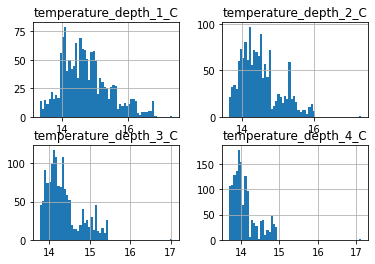

In [79]:
capteur_ZH.hist(['temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C'], bins=60)

## 3. Scatterplot

Un nuage de points permet de visualiser la relation entre deux variables quantitatives. Les données sont affichées sous la forme d'une collection de points, et tout point qui ne correspond pas au regroupement général des deux variables peut indiquer des valeurs aberrantes. 

génèrez un nuage de points entre les différentes variables de températures. 

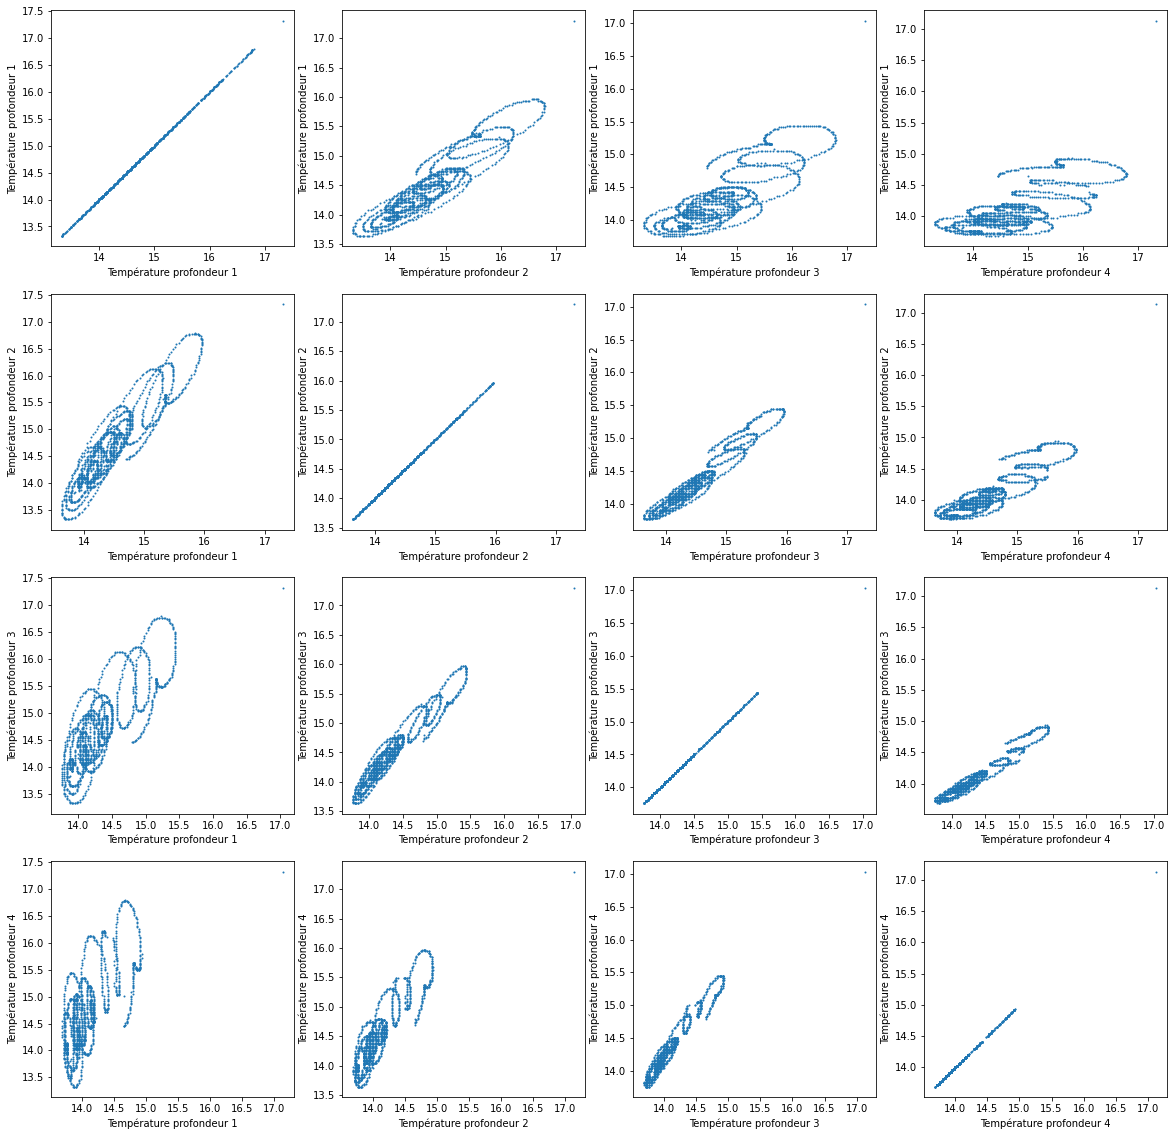

In [87]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

datas = [capteur_ZH.loc[:, column_name] for column_name in capteur_ZH.columns[1:6]]

for nom_1, data_1 in enumerate(datas):
    nom_2 = 1
    for ax, data_2 in zip(axes[nom_1], datas):
        ax.scatter(data_1, data_2, s=1)
        ax.set_ylabel(f"Température profondeur {nom_1+1}")
        ax.set_xlabel(f"Température profondeur {nom_2}")
        nom_2 += 1

plt.show()

## Identification des valeurs aberrantes avec l'écart interquartile (IQR)

L'écart interquartile (IQR) est une mesure de la dispersion statistique et est calculé comme la différence entre les 75e et 25e percentiles. Il est représenté par la formule IQR = Q3 - Q1. Les  lignes de code ci-dessous calculent et impriment l'écart interquartile pour chacune des variables de l'ensemble de données.  La règle générale est que tout ce qui n'est pas dans la plage de (Q1 - 1,5 IQR) et (Q3 + 1,5 IQR) est une valeur aberrante et peut être supprimé.

### Fonctions d'assistance

Ecrire des fonctions afin d'examiner chaque colonne des deux fichiers de données de terain et de calculer les 1er et 3e quartiles, l'intervalle inter-quartile et le minimum et le maximum. Toute valeur en dehors du minimum et du maximum est une valeur aberrante.

#### Capteur_ZH

In [88]:
IQ=[]
q=[]
Q=[]
for i in range(4) :
    dat = capteur_ZH[f'temperature_depth_{i+1}_C']
    IQ.append( dat.quantile(q=0.75)-dat.quantile(q=0.25))
    q.append(dat.quantile(q=0.25))
    Q.append(dat.quantile(q=0.75))
    
for i , valeur in enumerate(IQ):
    print(f"L'interquartile pour la température {i+1} vaut : {valeur}")

L'interquartile pour la température 1 vaut : 0.9809999999999999
L'interquartile pour la température 2 vaut : 0.6699999999999999
L'interquartile pour la température 3 vaut : 0.45500000000000007
L'interquartile pour la température 4 vaut : 0.31200000000000117


#### Capteur_riviere

In [92]:
IQ_riv=[]
q_riv=[]
Q_riv=[]
names = ['tension_V','temperature_stream_C','diff_charge_m']
for e in names :
    dat = capteur_riviere[e]
    IQ_riv.append( dat.quantile(q=0.75)-dat.quantile(q=0.25))
    q_riv.append(dat.quantile(q=0.25))
    Q_riv.append(dat.quantile(q=0.75))

for name, valeur in zip(names, IQ_riv):
    print(f"L'interquartile pour {name} vaut : {valeur}")

L'interquartile pour tension_V vaut : 0.023419999999999996
L'interquartile pour temperature_stream_C vaut : 1.3512500000000003
L'interquartile pour diff_charge_m vaut : 0.015543125617523443


## Suppression des valeurs aberrantes et visualisation du résultat

Après avoir fait tout le gros du travail dans les fonctions d'assistance, nous pouvons maintenant supprimer les lignes des données qui contiennent des valeurs aberrantes en dehors de | - et - | moustaches…

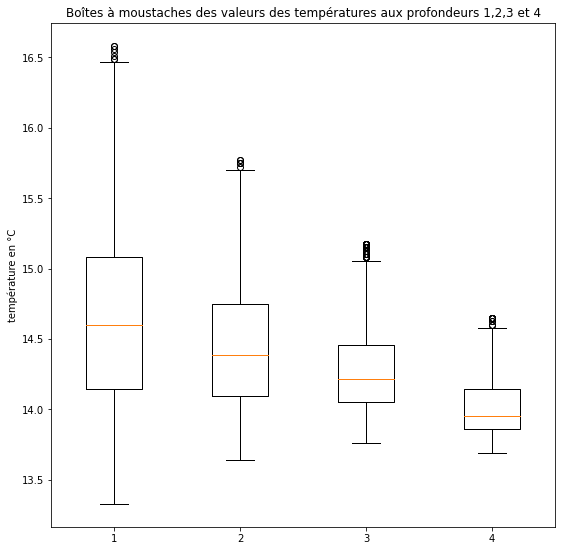

In [93]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1])
data = []
names=[]
for i in range(4):
    dat = capteur_ZH[f'temperature_depth_{i+1}_C'].values 
    dat = dat[(dat > q[i]-1.5*IQ[i]) & (dat<Q[i]+1.5*IQ[i])]
    data.append(dat)
    names.append(f'Temperature à la profondeur {i+1}')
ax.boxplot(data)
plt.ylabel('température en °C')
plt.title('Boîtes à moustaches des valeurs des températures aux profondeurs 1,2,3 et 4')
plt.show()

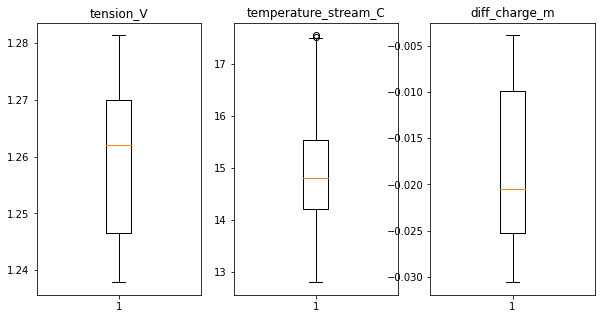

In [95]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10, 5))
data_IQ_riv = []
ax = [ax1,ax2,ax3]
features=['tension_V','temperature_stream_C','diff_charge_m']
for i in range(3):
    dat = capteur_riviere[features[i]].values 
    dat = dat[(dat > q_riv[i]-1.5*IQ_riv[i]) & (dat<Q_riv[i]+1.5*IQ_riv[i])]
    ax[i].boxplot(dat)
    ax[i].set_title(features[i])
plt.show()

## Expliquez le résultat
Est-ce que cette méthodologie vous semble suffisante? Tentez de trouver les limites de cette méthodologie?
Que pouvez vous apportez aux fonctions afin de les améliorer?

Cette méthode permet d'éliminer les valeurs aberrantes trop éloignées des valeurs habituellement prises. C'est une méthode utile, mais pas suffisante dans certains cas, par exemple lorsque certaines valeurs erreurs restent dans l'intervalle considéré. Ces erreurs peuvent être détectées par exemple en vérifiant que la grandeur ne varie pas trop vite.

Un moyen d'améliorer la fonction pourrait par exemple être de limiter l'écart de valeurs entre grandeurs voisines à qelques fois la précision de l'appareil de mesure.

## Valeurs abérantes avec la méthode score Z 
Il s'agit d'une unité mesurée en écart-type. Fondamentalement, il s'agit d'une mesure de la distance entre le score brut et la moyenne. Il est compris entre -3 et +3, où 0 = moyenne et 1 = écart-type, c'est-à-dire une distribution normale.

Cette méthode suggère qu'en tout point de données il existe une relation entre l'écart-type et la moyenne. Le score Z permet de trouver la distribution des données où la moyenne est égale à 0 et l'écart-type à 1, c'est-à-dire une distribution normale. Vous devez vous demander en quoi cela peut nous aider à identifier les valeurs aberrantes ? En calculant le score Z, nous redimensionnons et centrons les données et recherchons les points de données qui sont trop éloignés de zéro. Ces points de données qui sont trop éloignés de zéro seront traités comme des valeurs aberrantes. Dans la plupart des cas, un seuil de 3 ou -3 est utilisé, c'est-à-dire que si la valeur du score Z est supérieure ou inférieure à 3 ou -3 respectivement, ce point de données sera identifié comme aberrant.

Formule pour le score Z = (Observation - Moyenne)/Écart-type

z = (X - μ) / σ

Ecrire des functions afin de pouvoir appliquer cette méthodologie aux données

In [97]:
def std_scaled(X):
    m = X.mean()
    std = X.std()
    res = (X-m)/std
    return res

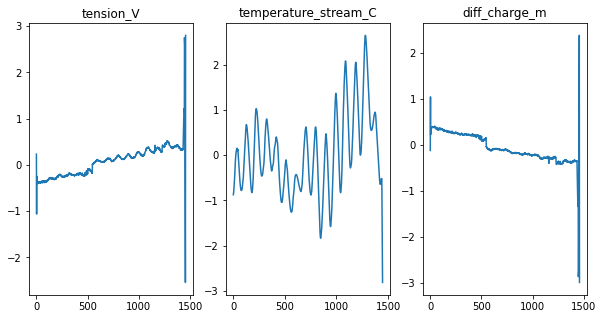

In [99]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10, 5))
ax = [ax1,ax2,ax3]
features=['tension_V','temperature_stream_C','diff_charge_m']
for i in range(3):
    dat = std_scaled(capteur_riviere[features[i]])
    dat = dat[(dat<3) & (dat>-3)]
    ax[i].plot(dat)
    ax[i].set_title(features[i])
plt.show()

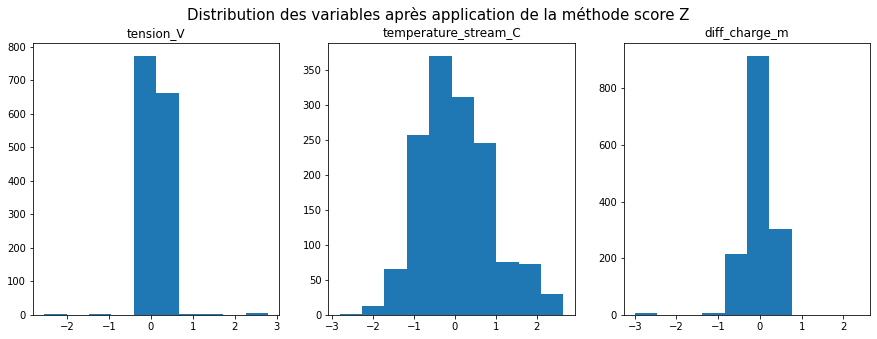

In [101]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 5))
fig.suptitle("Distribution des variables après application de la méthode score Z", fontsize = 15)
ax = [ax1,ax2,ax3]
features=['tension_V','temperature_stream_C','diff_charge_m']
for i in range(3):
    dat = std_scaled(capteur_riviere[features[i]])
    dat = dat[(dat<3) & (dat>-3)]
    ax[i].hist(dat)
    ax[i].set_title(features[i])
plt.show()

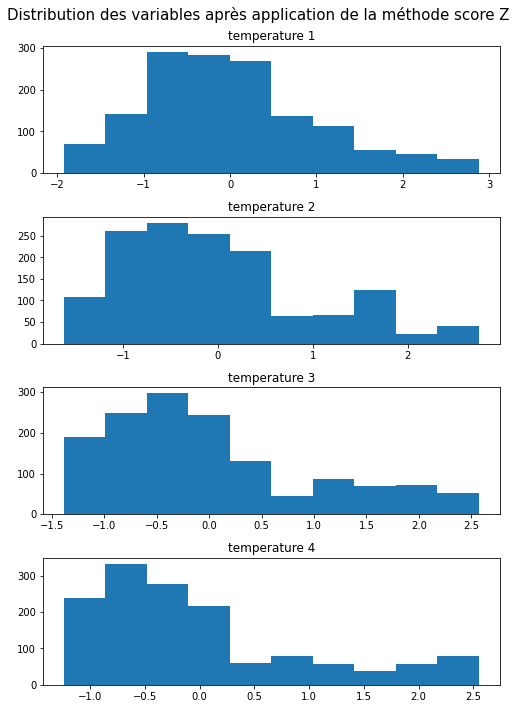

In [102]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(4,1, figsize=(7, 10))
fig.suptitle("Distribution des variables après application de la méthode score Z", fontsize = 15)
ax = [ax1,ax2, ax3, ax4]

for i in range(4):
    dat = std_scaled(capteur_ZH[f"temperature_depth_{i+1}_C"])
    dat = dat[(dat<3) & (dat>-3)]
    ax[i].hist(dat)
    ax[i].set_title(f"temperature {i+1}")
    fig.tight_layout()
plt.show()



## Comparer les deux méthodologies, donner leurs avantages et leurs limitations
Vous pouvez proposer des alternatives.

## Proposer une fonction permettant d'aller des données brutes jusqu'au traitement des données.

N'oubliez pas de permettre à l'utilisateur de pouvoir prendre des décisions et de l'aider à prendre ces décisions
Pensez à indiquer à l'utilisateur si le jeu de données est utilisable, quels sont les capteurs défaillants, quel semble être l'orientation des échanges nappe-rivière, les données de différence de charge semblent-elles donner les mêmes informations que les données du profil de température.

Votre fonction doit prendre en entrée, les trois fichiers, le nom du point et proposer au fur et à mesure de son déroulé des propositions à l'utilisateur.

# Deux autres jeux de données sont disponibles sur le répertoire github.
Votre rôle est de traiter et d'analyser ces données avec la méthodologie que vous avez développé